In [1]:
install.packages("devtools")
install.packages("dplyr")
install.packages("rmarkdown")
install.packages("ggplot2")
install.packages("broom")
install.packages("gridExtra")
install.packages("shiny")
install.packages("cubature")
install.packages("tidyr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘knitr’, ‘evaluate’, ‘tinytex’, ‘xfun’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘generics’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘lifecycle’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(devtools)

In [10]:
getwd()

[1] "/Users/jtrimble/coursera/statistics_w_R/191130_stat_w_r/notebooks"

In [28]:
load("../data/arbuthnot.rda")

In [36]:
ar <- data.frame(arbuthnot)

In [37]:
head(ar)

year,boys,girls
1629,5218,4683
1630,4858,4457
1631,4422,4102
1632,4994,4590
1633,5158,4839
1634,5035,4820


In [38]:
dim(ar)

[1] 82  3

2) arbuthnot$girls

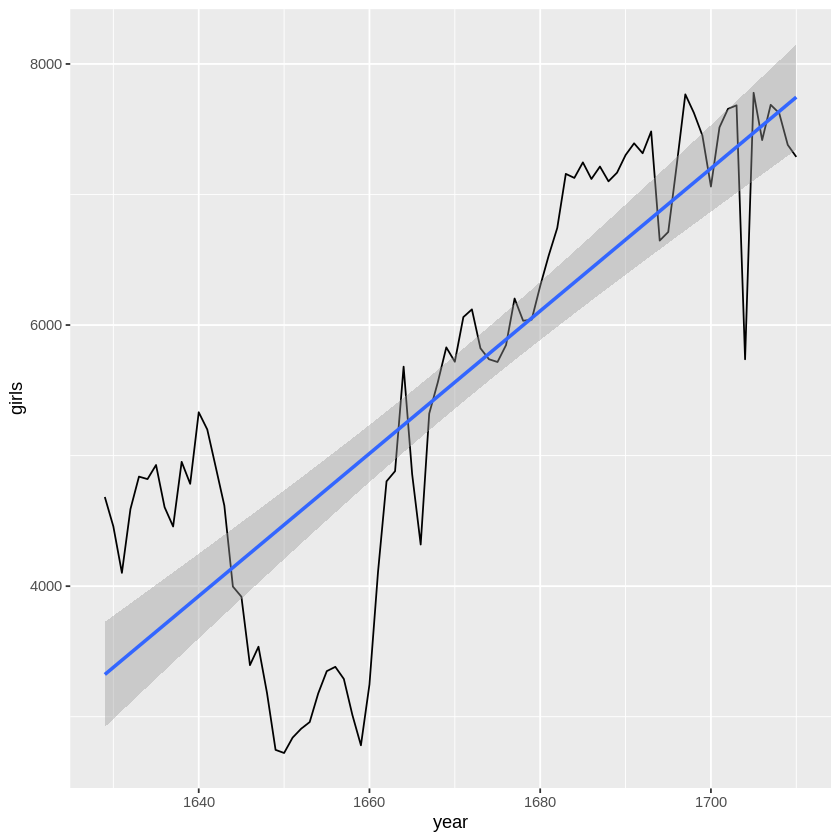

In [42]:
library(ggplot2)
ggplot(ar, aes(x=year, y=girls)) + geom_line() + geom_smooth(method="lm")

1) Overall there is an increasing trend. The answer would be B from the choices provided

In [47]:
library(dplyr)

In [48]:
ar <- ar %>%
  mutate(total = boys + girls)

head(ar)

3) ggplot(ar, aes(x = year, y = boys)) +
  geom_line()
  
  The boys trend just like the girls

In [53]:
load("../data/present.rda")

In [55]:
head(present)

year,boys,girls
1940,1211684,1148715
1941,1289734,1223693
1942,1444365,1364631
1943,1508959,1427901
1944,1435301,1359499
1945,1404587,1330869


4) 2

In [56]:
range(present$year)

[1] 1940 2013

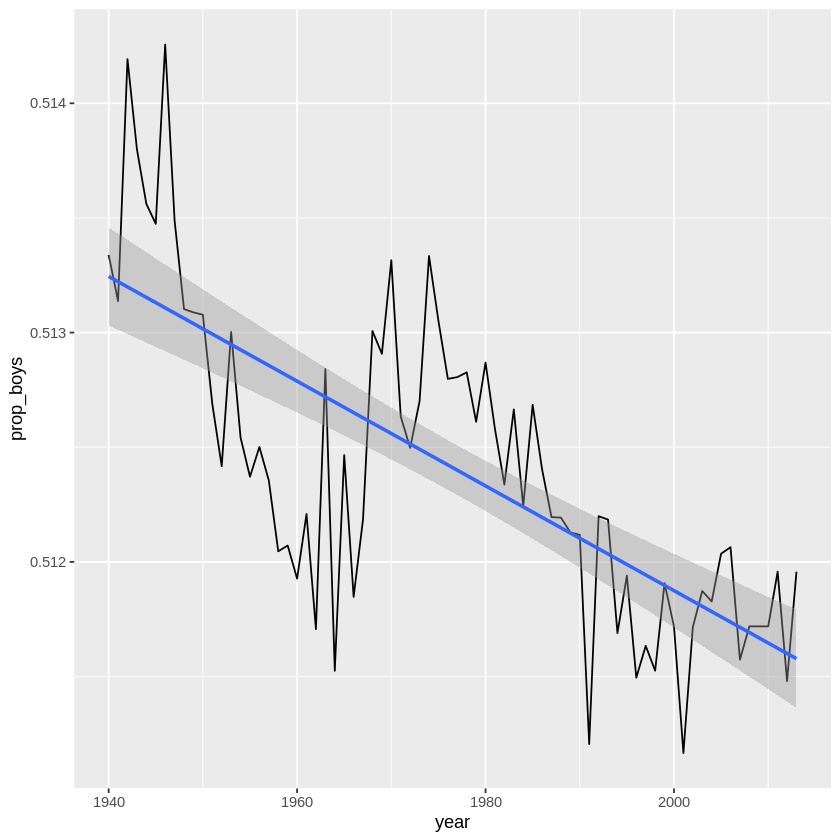

In [66]:
(
    present %>% 
    mutate(total = boys + girls) %>% 
    mutate(prop_boys = boys/total) %>%
    ggplot(aes(x=year, y=prop_boys)) + geom_line() + geom_smooth(method="lm")
)

(
    present %>% 
    mutate(total = boys + girls) %>% 
    mutate(prop_boys = boys/total) %>%
    ggplot(aes(x=year, y=prop_boys)) + geom_line() + geom_smooth(method="lm")
)

5) True

present %>% mutate(more_boys = boys > girls) %>% group_by(more_boys) %>% summarize(count=n())

6) every year there are more boys than girls

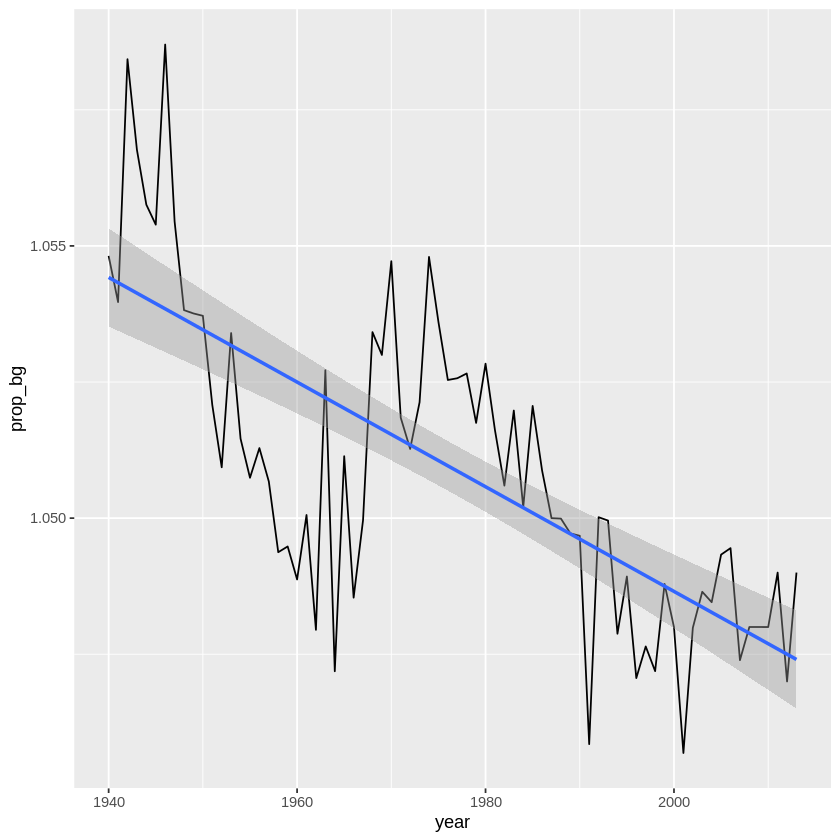

In [82]:
(
    present %>% 
    mutate(prop_bg = boys/girls) %>% 
    ggplot(aes(x=year, y=prop_bg)) + geom_line() + geom_smooth(method="lm")
)

7) Answer = There is initially a decrease in the 
    boy-to-girl ratio, and then an increase 
    between 1960 and 1970, followed by a decrease.

In [98]:
new_df <- present %>% mutate(total = boys + girls) 

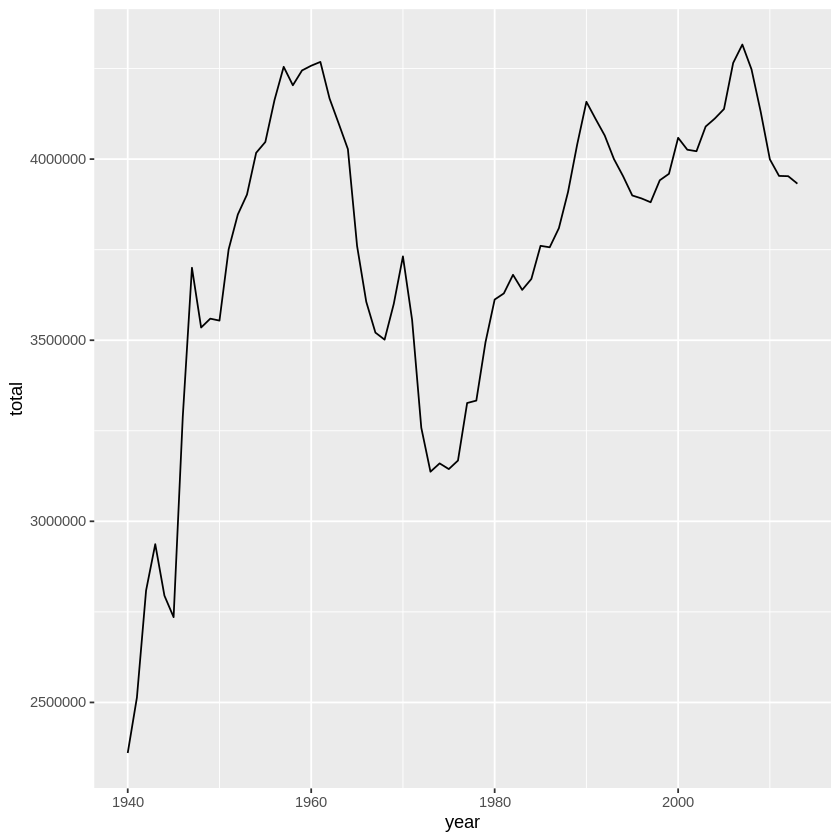

In [117]:
ggplot(new_df, aes(x=year, y=total))+geom_line()

In [118]:
head(new_df[order(-new_df$total),])

year,boys,girls,total,prop_boys
2007,2208071,2108162,4316233,0.5115736
1961,2186274,2082052,4268326,0.5122088
2006,2184237,2081318,4265555,0.5120640
1960,2179708,2078142,4257850,0.5119269
1957,2179960,2074824,4254784,0.5123550
2008,2173625,2074069,4247694,0.5117188


8) 2007
head(new_df[order(-new_df$total),])


## LAB 2 Intro to Data

In [234]:
load("../data/nycflights.rda")
nf <- nycflights

In [126]:
names(nf)

[1] "year"      "month"     "day"       "dep_time"  "dep_delay" "arr_time" 
 [7] "arr_delay" "carrier"   "tailnum"   "flight"    "origin"    "dest"     
[13] "air_time"  "distance"  "hour"      "minute"

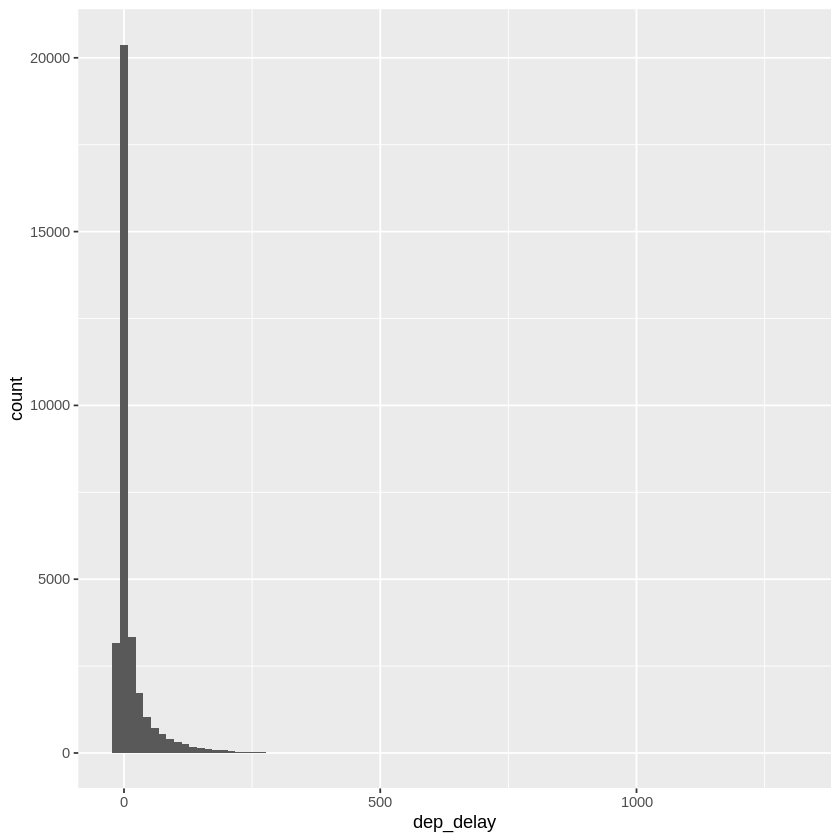

In [130]:
ggplot(data = nf, aes(x=dep_delay)) + geom_histogram(binwidth = 15)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


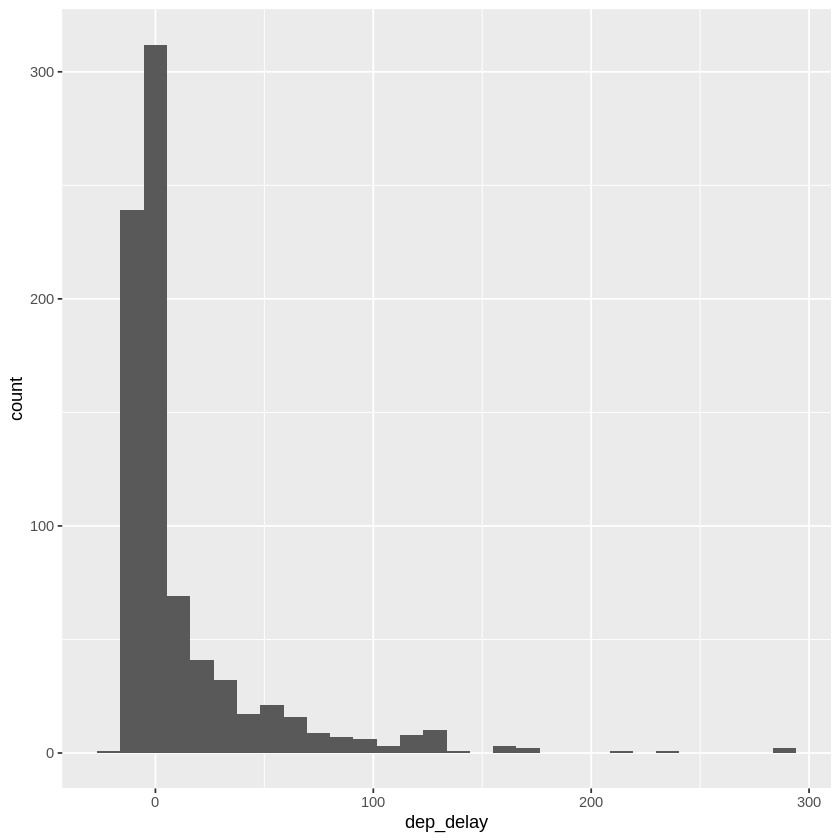

In [235]:
rdu_flights <- nf %>%
  filter(dest == "RDU")
ggplot(data = rdu_flights, aes(x = dep_delay)) +
  geom_histogram()

In [131]:
rdu_flights %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())

mean_dd,sd_dd,n
11.69913,35.55567,801


In [236]:
sfo_feb_flights <- nf %>%
  filter(dest == "SFO", month == 2)

In [237]:
nrow(sfo_feb_flights)

[1] 68

### 1) 68

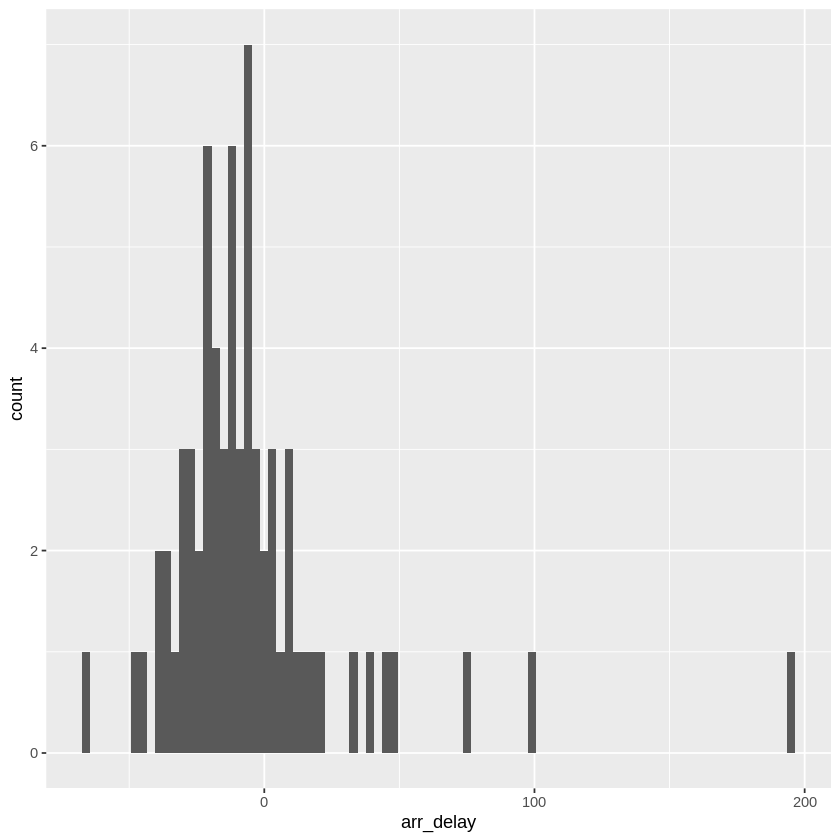

In [286]:
ggplot(sfo_feb_flights, aes(x=arr_delay)) + geom_histogram(binwidth=3)

### 2) ggplot(sfo_feb_flights, aes(x=arr_delay)) + geom_histogram(binwidth=3)
###    It's false that no flight is delayed more than 2 hours. There is one flight at almost 3 hours or 180 minutes

In [194]:
sfo_feb_flights %>% group_by(carrier) %>% summarise(iqr = IQR(arr_delay), med= median(arr_delay))

carrier,iqr,med
AA,17.50,5.0
B6,12.25,-10.5
DL,22.00,-15.0
UA,22.00,-10.0
VX,21.25,-22.5


## 3) Delta and United airlines had the largest IQR

In [238]:
nf %>%
  group_by(month) %>%
  summarise(mean_dd = mean(dep_delay), med= median(dep_delay)) %>%
  arrange(desc(mean_dd))

month,mean_dd,med
7,20.754559,0
6,20.350293,0
12,17.368189,1
4,14.554477,-2
3,13.517602,-1
5,13.264800,-1
8,12.619097,-1
2,10.687227,-2
1,10.233333,-2
9,6.872436,-3


## 4) 
### nycflights %>%
###  group_by(month) %>%
###  summarise(mean_dd = mean(dep_delay)) %>%
###  arrange(desc(mean_dd))
### July has the highest average delay  
  

## 5) December has the highest median departure delay

## 6) Both give us useful information

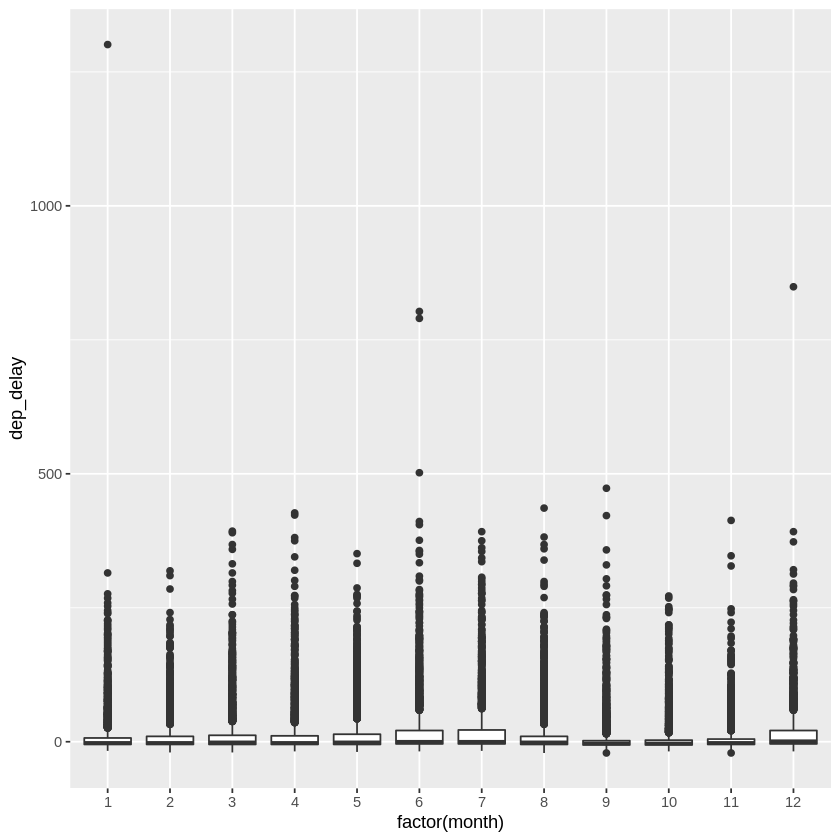

In [239]:
ggplot(nf, aes(x = factor(month), y = dep_delay)) +
  geom_boxplot()

In [249]:
nycflights <- nf %>%
  mutate(dep_type = ifelse(dep_delay < 5, "on time", "delayed"))

In [242]:
nycflights %>%
  group_by(origin) %>%
  summarise(ot_dep_rate = sum(dep_type == "on time") / n()) %>%
  arrange(desc(ot_dep_rate))

origin,ot_dep_rate
LGA,0.7279229
JFK,0.6935854
EWR,0.6369892


## 7) I would select LGA

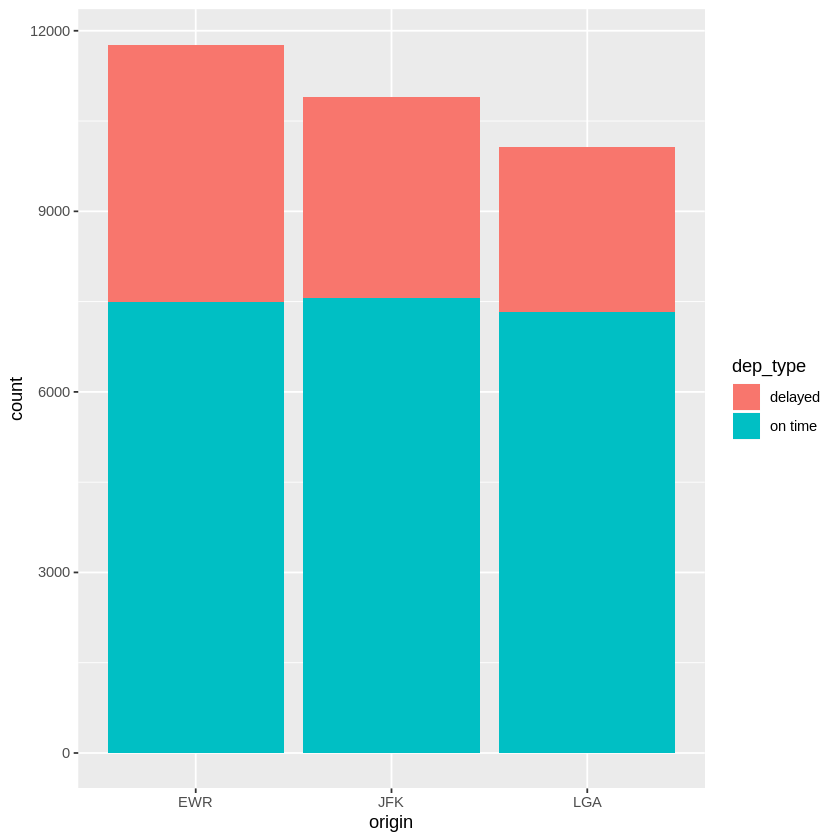

In [202]:
ggplot(data = nycflights, aes(x = origin, fill = dep_type)) +
  geom_bar()

In [243]:
head(nycflights)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_type
2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,delayed
2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,on time
2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,on time
2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,on time
2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,on time
2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17,on time


In [255]:
nycf <- nycflights %>% mutate(avg_speed=distance/(air_time/60))
#select(avg_speed, tailnum)

In [252]:
head(nycf[order(-nycf$avg_speed),])

avg_speed,tailnum
703.3846,N666DN
557.4419,N779JB
554.2197,N571JB
547.8857,N568JB
547.8857,N5EHAA
547.8857,N656JB


## 8) N666DN has the fastest average speed

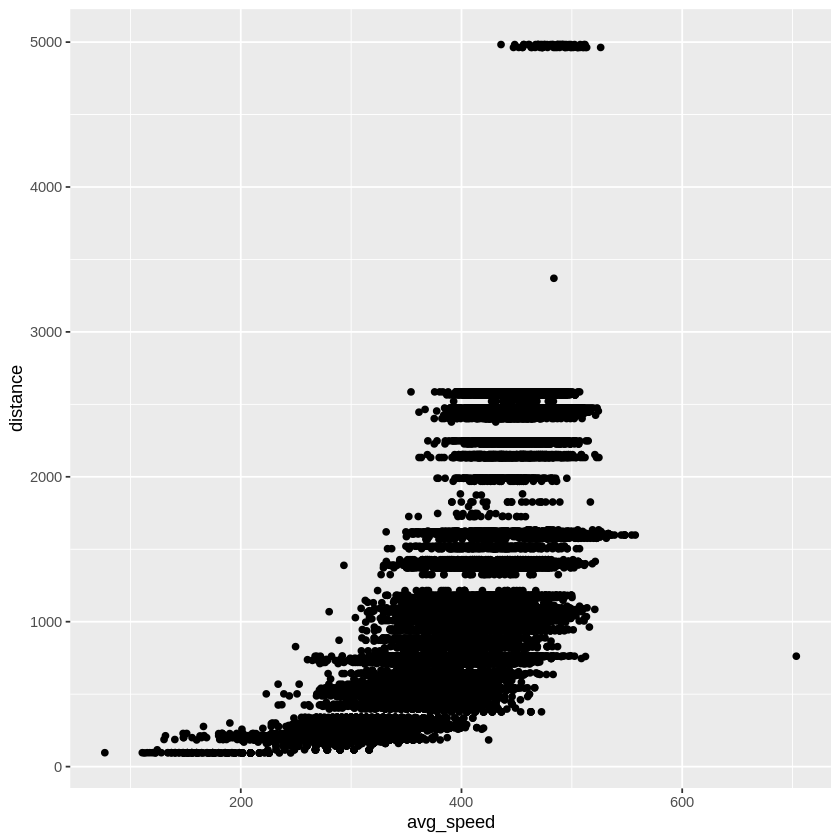

In [257]:
ggplot(nycf, aes(x=avg_speed, distance)) + geom_point()

## 9) There's an overall, positive correlation between distance and average speed

In [258]:
head(nycflights)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_type
2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,delayed
2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,on time
2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,on time
2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,on time
2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,on time
2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17,on time


In [259]:
late_ontime <-nycflights %>%
  mutate(arr_type = ifelse(arr_delay <= 0, "on time", "delayed")) 

In [261]:
head(late_ontime)

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_type,arr_type
2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,delayed,on time
2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,on time,delayed
2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,on time,delayed
2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,on time,on time
2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,on time,on time
2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17,on time,delayed


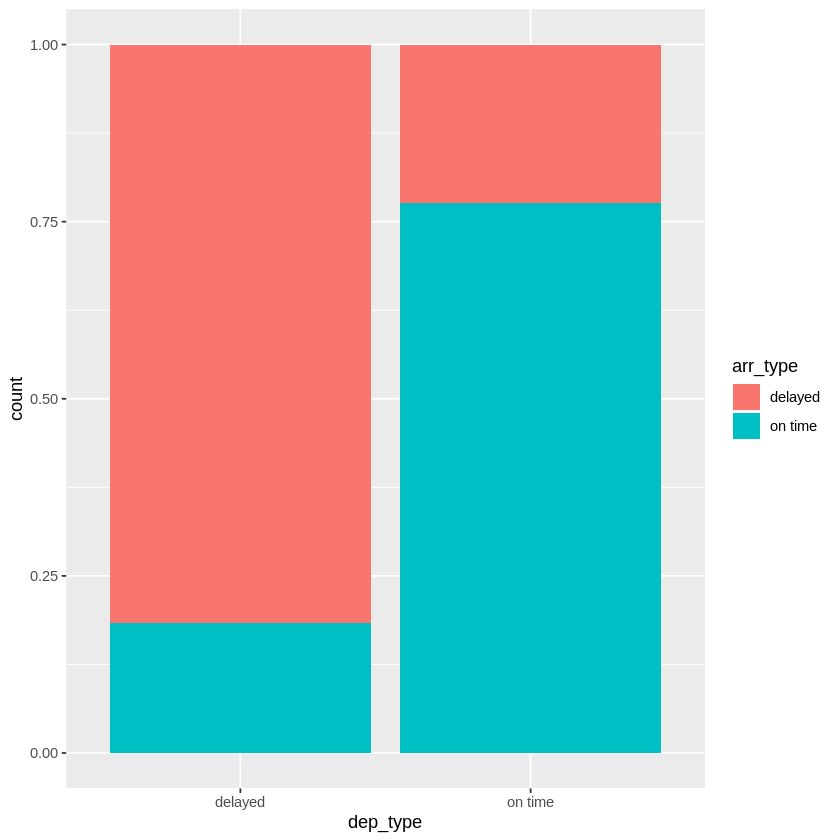

In [298]:
ggplot(late_ontime, aes(x=dep_type, fill=arr_type)) + 
    geom_bar(position='fill')

## 10) between 18-19% actually arrived on time after being delayed